<a href="https://colab.research.google.com/github/CuadraAlconero/IDAL_IA3_CuadraAlconero/blob/main/computer_vision_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision

La visión por computador (computer vision) se define como un área científica que estudia métodos para permitir a los ordenadores ganar conocimiento de alto nivel de imágenes y vídeos.

La visión por computador comprende desde técnicas para tratar las imágenes (preprocesado de datos) hasta métodos que permiten calcular características (features) y extraer conclusiones de la fuente de datos. 

En los últimos años las técnicas de Deep Learning han tomado especial relevancia en las tareas de computer visión debido a la alta complejidad del tratamiento y el procesamiento de imágenes. Sin embargo, a día de hoy, muchas tareas de visión por computador siguen resolviéndose con algoritmos clásicos y técnicas tradicionales de computer vision.



## Problemas clásicos de computer vision

Algunos de los problemas clásicos de computer vision son:

- Clasificación: Predecir una o más etiquetas que permitan clasificar la imagen.

- Regresión: Predecir uno o más valores numéricos de propiedades que se puedan inferir a través de la imagen.

- Detección de objetos (Object Detection): Encontrar un objeto de una clase específica en la imagen y calcular sus coordenadas.

- Seguimiento de objetos (Tracking): Seguir el movimiento de un objeto en una secuencia de imágenes ordenada.



# Convolución

Antes de comenzar a estudiar las diferentes técnicas de deep learning que se utilizan para resolver los problemas de computer vision estudiaremos una operación que tomará especial importancia en estos métodos, la convolución.

La convolución puede definirse como una operación que involucra a dos funciones y genera una nueva función que expresa como la forma de la primera función es modificada por la acción de la otra.

Su definición para variables continuas es la siguiente:

$f(τ)*g(τ) = \int_{-inf}^{inf} f(τ)g(t-τ)dτ$

Y para variables discretas:

$f[m]*g[m] = \sum_{n=-inf}^{inf} f[m]g[n-m]$

El resultado de realizar la convolución sobre dos funciones puede apreciarse en la siguiente imagen:

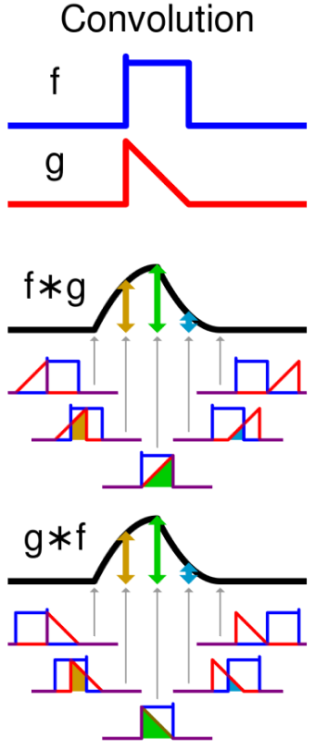

Sin embargo la operación realizada a menudo en visión por computador y en concreto en las técnicas de deep learning es similar pero no exactamente igual que esta, es conocida como cross-correlation.

## Cross-Correlation

La cross-correlation de dos funciones es una técnica que permite medir la similitud de una función con respecto a otra que se desliza. Su definición para variables continuas es:

$f(τ)\star g(τ) = \int_{-inf}^{inf} f(τ)g(t+τ)dτ$

Y para variables discretas:

$f[m]\star g[m] = \sum_{n=-inf}^{inf} f[m]g[n+m]$

El resultado de la cross-correlation puede encontrarse en la siguiente imagen:

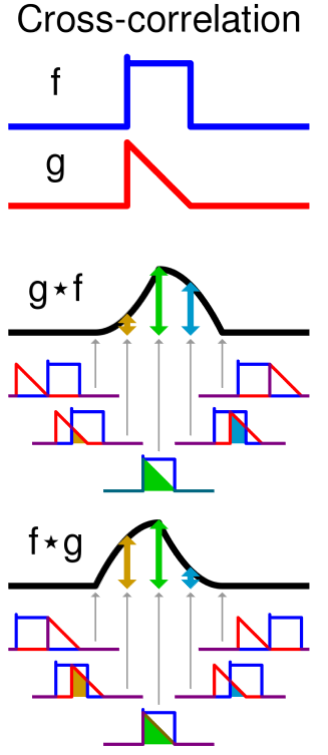

En deep learning cuando se habla de convolución en realidad se hace referencia a cross-correlation debido a que la segunda función por la que se multiplica no se gira (-τ y τ).

# Ejercicio

Realiza la cross-correlation de una señal seno y coseno utilizando scipy.signal.correlate. Utilizad np.sin y np.cos para calcular el seno y el coseno.

Visualizad el seno, el coseno y el resultado de la correlación.

In [4]:
import numpy as np
from scipy.signal import correlate 
import plotly.express as px

In [36]:
# Código aquí
x = np.linspace(0,10,num=300) #Input seno
x_2 = x+1.57 #Input coseno

# 2D Convolution (Cross-Correlation)

Hasta el momento hemos estudiado la definición general de convolución y hemos realizado un ejercicio sobre señales en 1D. Sin embargo las imágenes se representan mediante matrices en 2D.

Vamos a definir algunos conceptos que aparecerán frecuentemente.

Imagen: Input o entrada del proceso de computer vision.

Filtro (filter): Matriz en 2d que se desliza a través de la entrada durante la convolución.

Padding: Valores nulos que se añaden a la imagen con el objetivo de no reducir su tamaño durante la convolución.

Stride: Velocidad de deslizamiento del filtro sobre la imagen.

La convolución en 2d se define como el **dot product** del filtro sobre cada región de la imagen. Veámoslo con un ejemplo

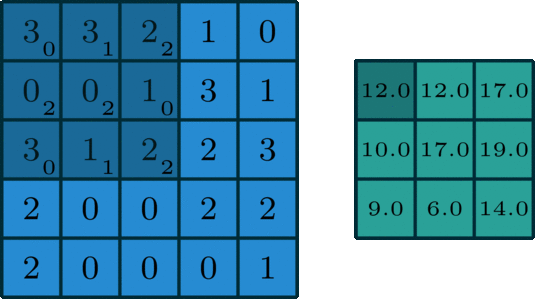

In [44]:
# Supongamos que tenemos estas dos matrices como input y filter
matrix_input = np.array([[3,3,2,1,0],
                        [0,0,1,3,1],
                        [3,1,2,2,3],
                        [2,0,0,2,2],
                        [2,0,0,0,1]])
filter = np.array([[0,1,2],
                   [2,2,0],
                   [0,1,2]])

In [49]:
# Calculamos el primer valor
matrix_slice = matrix_input[:3,:3]
result = np.multiply(matrix_slice, filter) #Element wise mult
result

array([[0, 3, 4],
       [0, 0, 0],
       [0, 1, 4]])

# Ejercicio

Calculad los valores de la diagonal de la matriz resultante en el ejemplo

Como se puede apreciar el resultado de la convolución de la entrada por el filtro es una matriz de menor tamaño que la original. Las dimensiones de la salida dependen de la dimensión de la entrada (input) y la velocidad a la que esta se recorre por el filtro.

La dimensión a la salida se puede controlar mediante los parámetros padding y stride. Veamoslos en detalle.

Como habéis podido comprobar al realizar la convolución de la entrada con el filtro se reduce el tamaño de la salida. Esto se da debido al tipo de operación que se realiza sobre la imagen. Sin embargo, a menudo es deseable que la entrada y la salida del proceso tengan el mismo tamaño. Una posible solución para este problema es añadir padding a la imagen. El término padding hace referencia al concepto de añadir "píxeles" falsos a la entrada tal y como se muestra en la siguiente imagen.

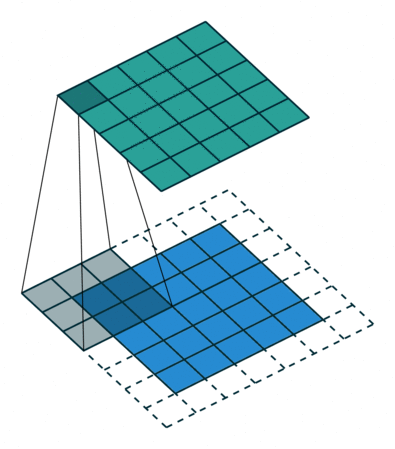

Al añadir estos píxeles falsos a la entrada se aumenta artificialmente el tamaño de la imagen consiguiendo de esta forma que el resultado final vea su tamaño inalterado.

En cuanto al término stride hace referencia a la velocidad con la que la ventana recorre a la imagen. Al aumentar este valor es posible recorrer la imagen a mayor velocidad, haciendo, en este caso, al resultado más pequeño.

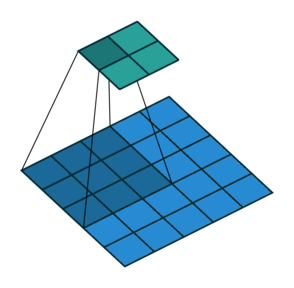